## Carseats Data Analysis

In [9]:
library(tidyverse)
library(ISLR)
library(FNN)
library(ggplot2)

#### Carseats dataset information
A data frame with 400 observations on the following 11 variables. \
Sales: Unit sales (in thousands) at each location \
CompPrice: Price charged by competitor at each location \
Income: Community income level (in thousands of dollars) \
Advertising: Local advertising budget for company at each location (in thousands of dollars) \
Population: Population size in region (in thousands) \
Price: Price company charges for car seats at each site \
ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site \
Age: Average age of the local population \
Education: Education level at each location \
Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location \
US: A factor with levels No and Yes to indicate whether the store is in the US or not

In [2]:
# overview dataset
head(Carseats)
sapply(Carseats, class)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


Sales   CompPrice      Income Advertising  Population       Price 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
  ShelveLoc         Age   Education       Urban          US 
   "factor"   "numeric"   "numeric"    "factor"    "factor"

### Linear Regression


Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

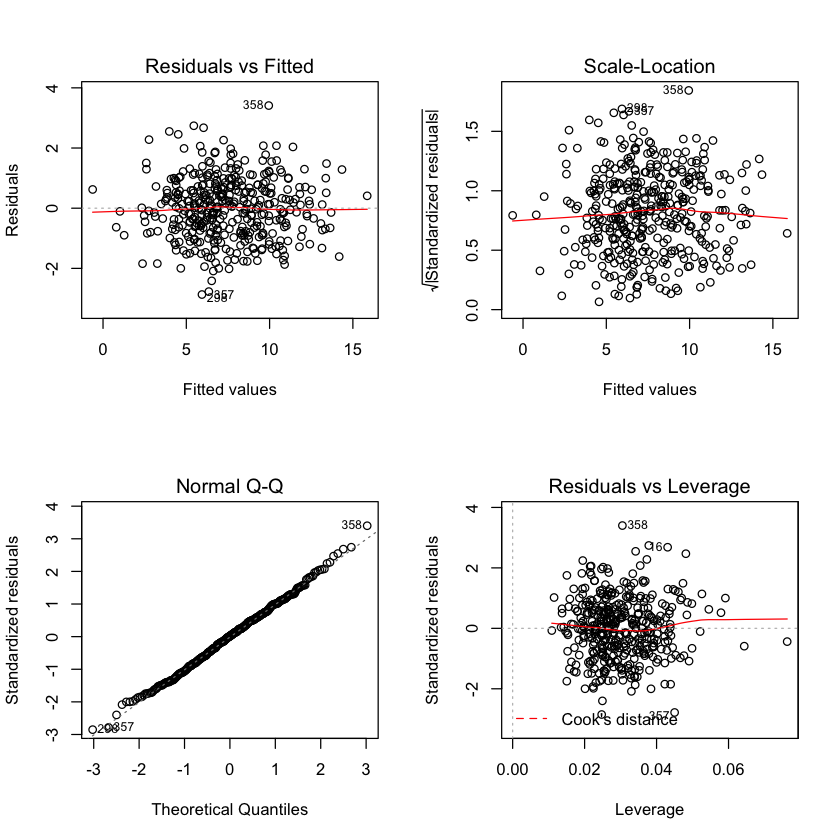

In [3]:
# do linear regression on Sales
mod1 = lm(Sales ~ ., data = Carseats)
summary(mod1)
par(mfcol = c(2,2))
plot(mod1)

The coefficient of each variable is:

In [4]:
coef(summary(mod1))[,1]

(Intercept)       CompPrice          Income     Advertising      Population 
   5.6606230631    0.0928153421    0.0158028363    0.1230950886    0.0002078771 
          Price   ShelveLocGood ShelveLocMedium             Age       Education 
  -0.0953579188    4.8501827110    1.9567148062   -0.0460451630   -0.0211018389 
       UrbanYes           USYes 
   0.1228863965   -0.1840928246

From summary table, we can get $R^2$ is 0.8734, which is close to 1, so we would like to say that this model fits pretty well.\
From Residuals vs Fitted plots, we could say that residuals have no non-linear pattern. From Scale-Location plot, the points almost distribute randomly, so there is no obvious outlier. From Normal Q-Q plot, the points distrubute almost following the normal distrubution. From Residuals vs Leverage plot, there is no high leverage and no high influencial point (no point exceed the Cook's distance line). We can conclude that the model fits well. \
I would use $\alpha$ = 0.05 as the significent level in these tests. When p < $\alpha$, we are likely to say that the predictors are significent. From summary table, CompPrice, Income, Advertising, Price, ShelveLoc and Age have significant p-values. The null hypotheis is the Urban has no impact on Sales.


Call:
lm(formula = Sales ~ . - Population - Education - Urban - US, 
    data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7728 -0.6954  0.0282  0.6732  3.3292 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.475226   0.505005   10.84   <2e-16 ***
CompPrice        0.092571   0.004123   22.45   <2e-16 ***
Income           0.015785   0.001838    8.59   <2e-16 ***
Advertising      0.115903   0.007724   15.01   <2e-16 ***
Price           -0.095319   0.002670  -35.70   <2e-16 ***
ShelveLocGood    4.835675   0.152499   31.71   <2e-16 ***
ShelveLocMedium  1.951993   0.125375   15.57   <2e-16 ***
Age             -0.046128   0.003177  -14.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.019 on 392 degrees of freedom
Multiple R-squared:  0.872,	Adjusted R-squared:  0.8697 
F-statistic: 381.4 on 7 and 392 DF,  p-value: < 2.2e-16


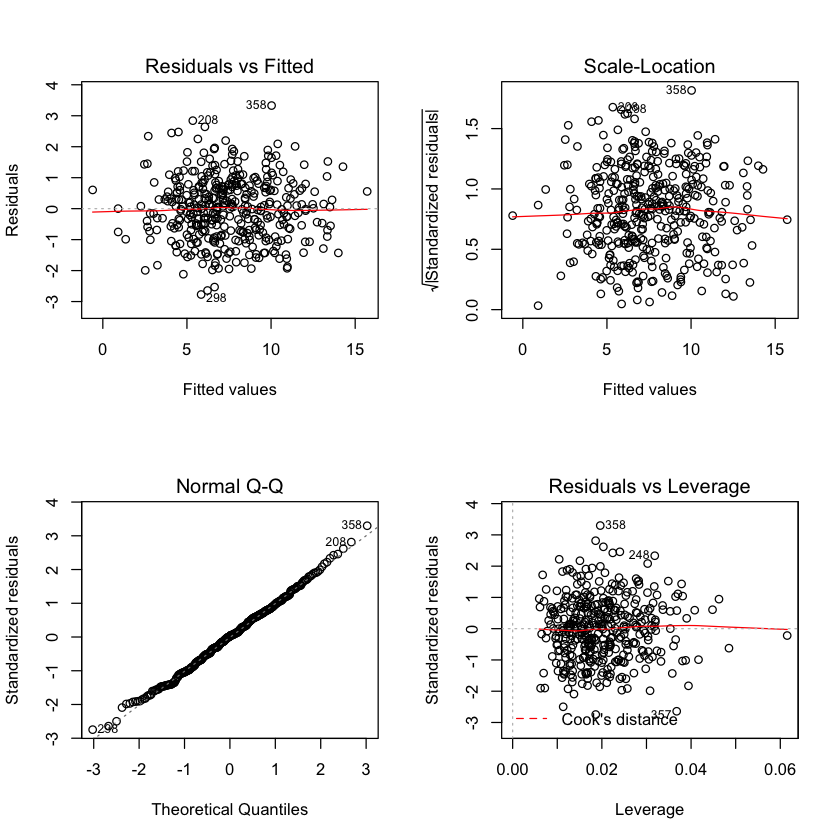

In [5]:
# build another model without not significant predictors
mod2 = lm(Sales ~ .-Population - Education - Urban - US, data = Carseats)
summary(mod2)
par(mfcol = c(2,2))
plot(mod2)

In [6]:
# do F-test between two models
anova(mod2, mod1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
392,407.3869,NA,NA,NA,NA
388,402.8335,4,4.553347,1.09642,0.3579599


The null hypothsis for the F-test is that none of the additional predictors in full model is significant. P-value > 0.05, and we accept null hypothsis. So we could conclude that the reduced model is better. And we could conclude that the difference between two models' $R^2$ is not significant.

In [7]:
# build another model with intersection term
mod3 = lm(Sales ~ .-Population - Education - Urban - US + ShelveLoc:Price, 
          data = Carseats)
summary(mod3)


Call:
lm(formula = Sales ~ . - Population - Education - Urban - US + 
    ShelveLoc:Price, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7984 -0.6896  0.0144  0.6743  3.3391 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.866758   0.696460   8.424 7.08e-16 ***
CompPrice              0.092592   0.004159  22.262  < 2e-16 ***
Income                 0.015766   0.001849   8.528 3.32e-16 ***
Advertising            0.116003   0.007746  14.975  < 2e-16 ***
Price                 -0.098594   0.004677 -21.082  < 2e-16 ***
ShelveLocGood          4.185088   0.747377   5.600 4.06e-08 ***
ShelveLocMedium        1.535031   0.628915   2.441   0.0151 *  
Age                   -0.046494   0.003209 -14.490  < 2e-16 ***
Price:ShelveLocGood    0.005619   0.006300   0.892   0.3730    
Price:ShelveLocMedium  0.003650   0.005386   0.678   0.4984    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

In [8]:
# do F-test between mod2 and mod3
anova(mod2, mod3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
392,407.3869,NA,NA,NA,NA
390,406.5174,2,0.869459,0.4170658,0.6592711


The p-value of F-test is greater than 0.05, so we would like to accept null hypothesis, saying that the interaction term is not significant.

### KNN

In [10]:
# split data into trianing and testing dataset
nrow(Carseats)*0.8
train_set = Carseats[1:320,]
test_set = Carseats[321:400,]

[1] 320

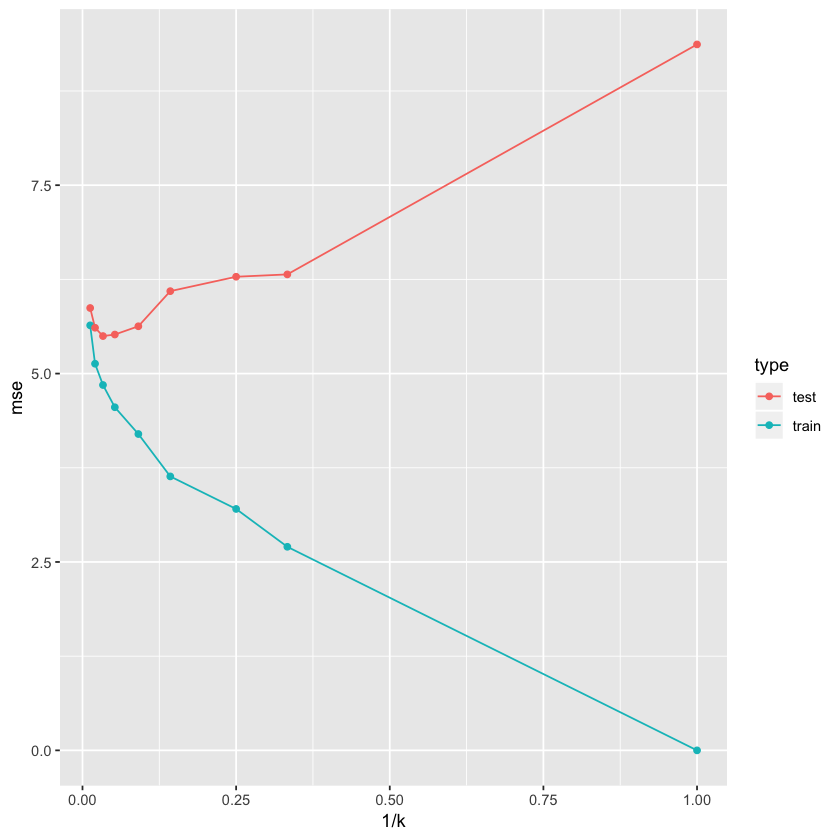

In [11]:
#standardize
Xtrain = cbind(train_set$CompPrice, train_set$Income, 
               train_set$Advertising, train_set$Price, train_set$Age)
xmeans <- colMeans(Xtrain)
xsd <- sqrt(diag(var(Xtrain)))
Xtrain <- scale(Xtrain, center=xmeans, scale=xsd)
Xtest <- scale(cbind(test_set$CompPrice, test_set$Income,
                     test_set$Advertising, test_set$Price, test_set$Age), center=xmeans, scale=xsd)

#KNN
k_range = c(1, 3, 4, 7, 11, 19, 30, 49,80)
train_mse_byK <- vector('numeric', length(k_range))
test_mse_byK <- vector('numeric', length(k_range))
 for(i in 1:length(k_range)) {
     knnTrain <- knn.reg(train = Xtrain, 
                         test = Xtrain,
                         y = train_set$Sales, 
                         k = k_range[i])
     knnTest <- knn.reg(train = Xtrain,
                        test = Xtest,
                        y = train_set$Sales,
                        k = k_range[i])
     
     train_mse_byK[i] <- mean((train_set$Sales - knnTrain$pred)^2)
     test_mse_byK[i] <- mean((test_set$Sales - knnTest$pred)^2)
 }

#plot
ggplot(
   data.frame(k = rep(k_range, 2),
              mse = c(train_mse_byK, test_mse_byK),
              type = rep(c('train','test'), each=length(k_range))),
   aes(x=1/k, y=mse, color=type)
 ) +  geom_line() + geom_point()

k=1 achieves the lowest training error; k=30 achieves the lowest testing error. In general, the training error goes down when K decrease. The testing error first decreases and then increases.

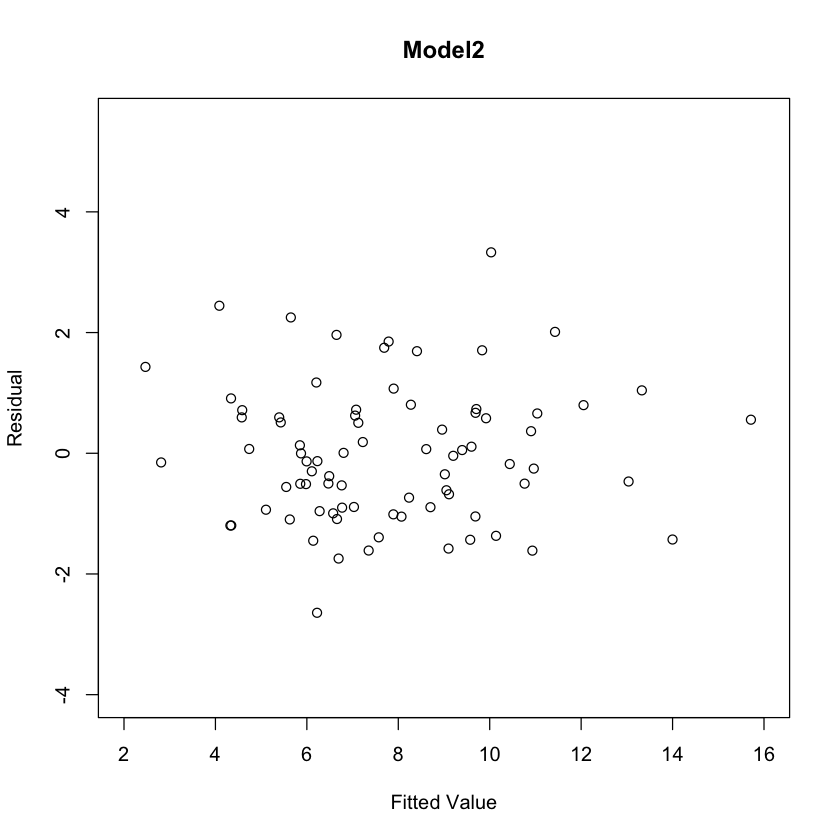

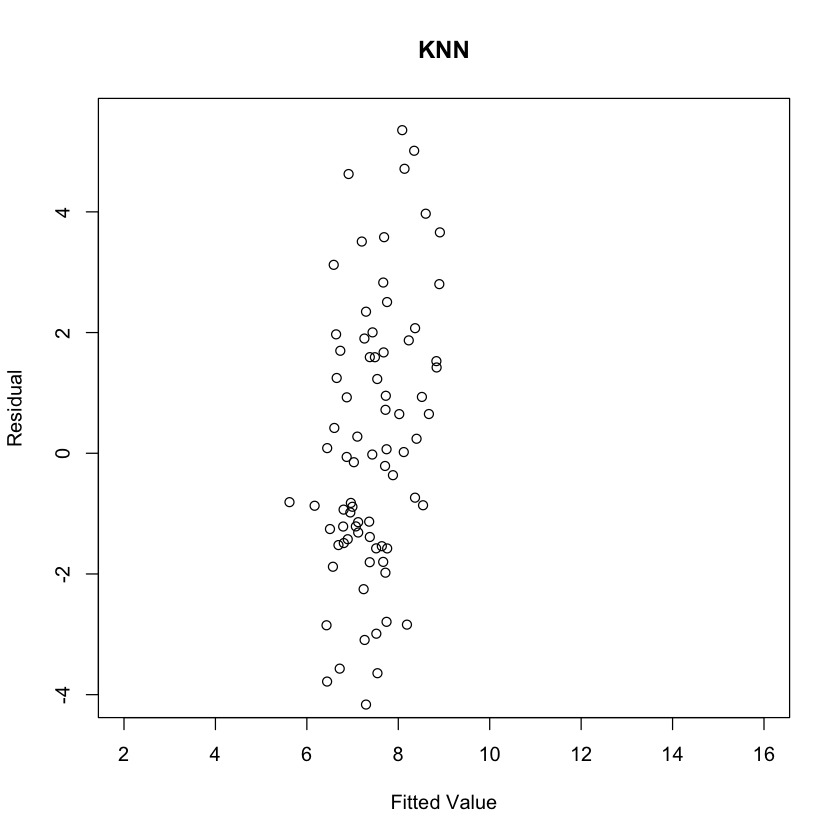

In [13]:
# apply knn with k=30
knnTest30 = knn.reg(train = Xtrain,
                       test = Xtest,
                       y = train_set$Sales,
                       k = 30)
res_knn = test_set$Sales - knnTest$pred
# plot residual plots
res_mod2 = test_set$Sales - predict(mod2,test_set)
mod2_pred = predict(mod2, test_set)
plot(mod2_pred, res_mod2, xlim=c(2,16), ylim=c(-4,5.5), 
     xlab = "Fitted Value", ylab ="Residual", title("Model2") )
plot(knnTest$pred, res_knn, xlim=c(2,16), ylim=c(-4,5.5), 
     xlab = "Fitted Value", ylab ="Residual", title("KNN") )

The points in both plots are distributed almost equally around 0. The fitted values from KNN gather between 6 to 10. While, the fitted value from model2 are distributed scattered. The distance between the max and min residuals from KNN is larger than which from model2.